In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def seir_f(t, y, alpha, beta, delta, gamma):
  r,x = y
  return np.array([(alpha * r )- (beta*r*x), (delta*r*x) - (gamma*x)])

In [3]:
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.1

In [4]:
sol = solve_ivp(seir_f, [0, 70], [5,2], rtol=1e-6, args=(alpha, beta, delta, gamma))

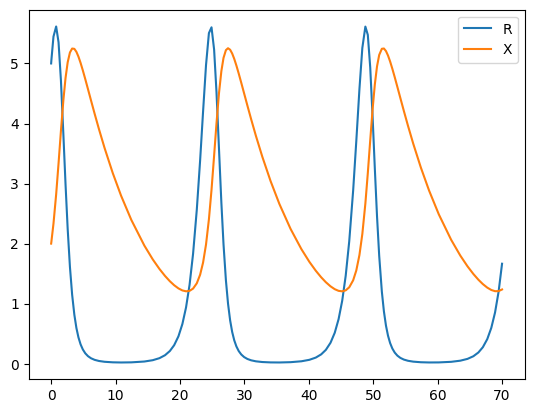

In [5]:
fig = plt.figure(); ax = fig.gca()
curves = ax.plot(sol.t, sol.y.T)
ax.legend(curves, ['R','X']);

In [6]:
def plot_ei(alpha = 1.1, beta = 0.4, delta = 0.1, gamma = 0.1, r0 = 5, x0 = 2, t1=60):
  # apply ODE solver
  sol = solve_ivp(seir_f, [0, t1], [r0,x0], rtol=1e-7, args=(alpha, beta, delta, gamma))
  # plot I and E components
  fig = plt.figure(); ax = fig.gca()
  ax.plot(sol.t, sol.y[0, :].T, color='brown', linestyle='dashed', label='R')
  ax.plot(sol.t, sol.y[1, :].T, color='red', label='X')
  ax.legend()
  return ax

<Axes: >

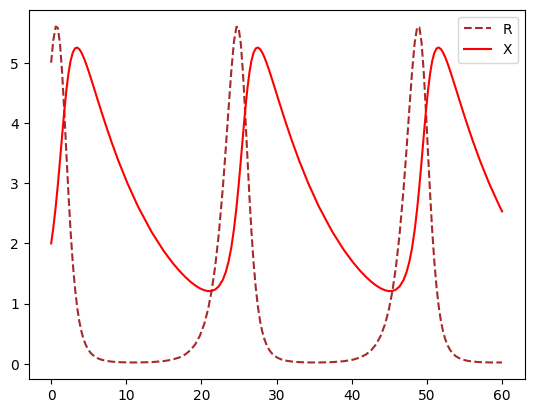

In [7]:
plot_ei()

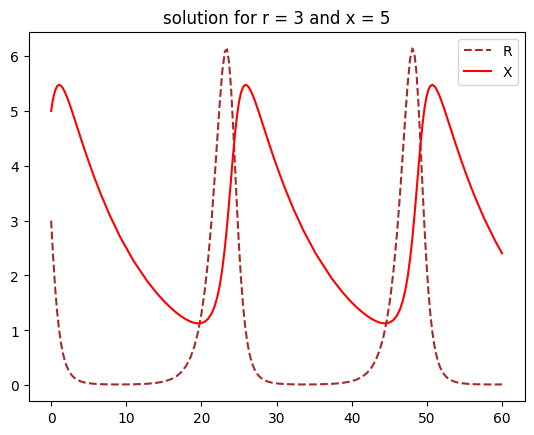

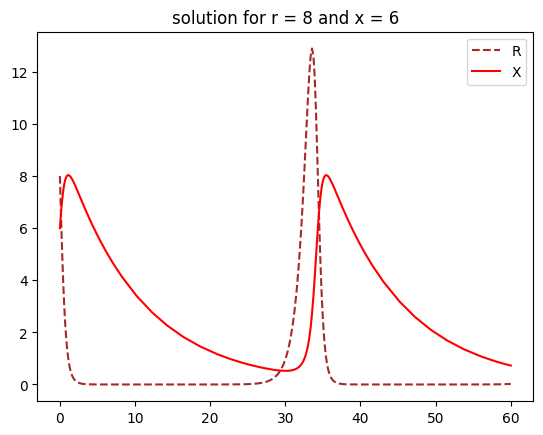

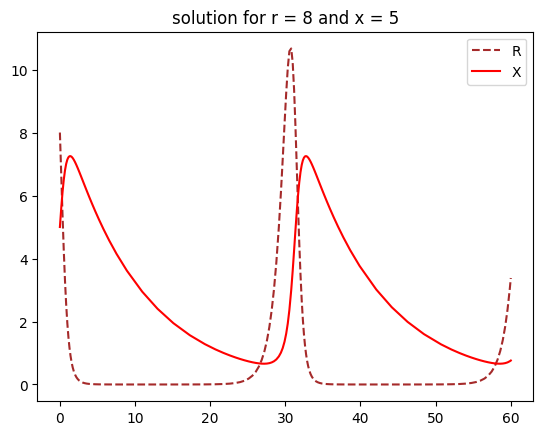

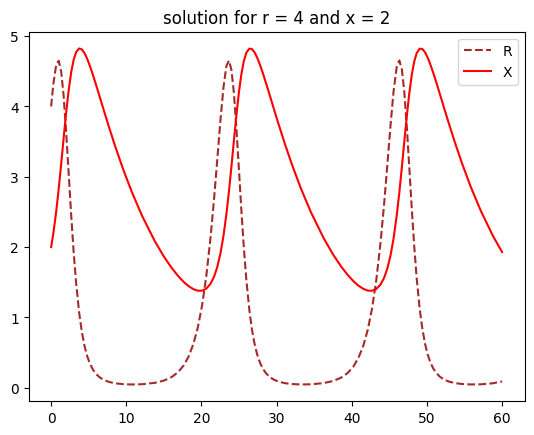

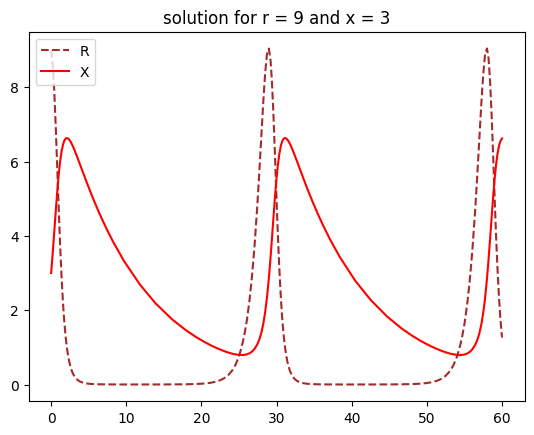

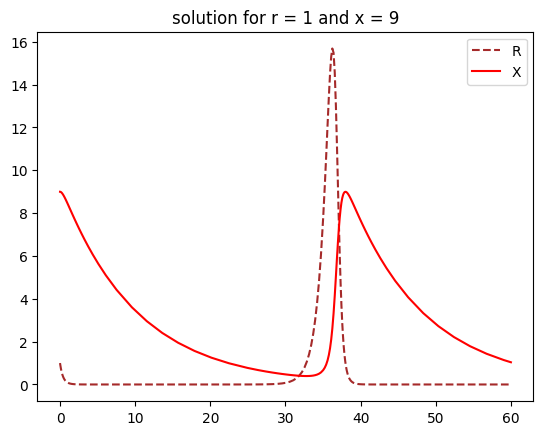

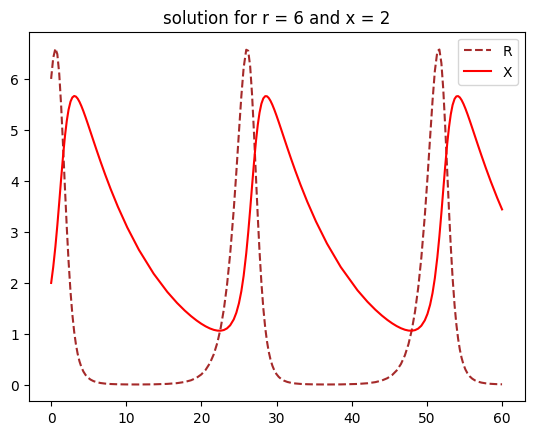

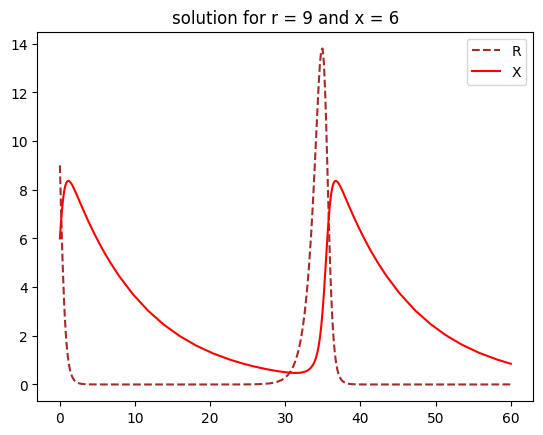

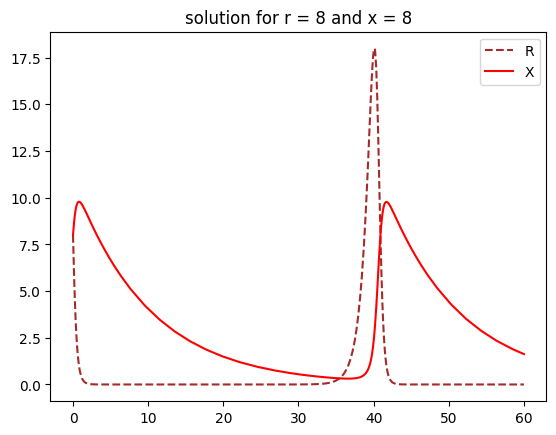

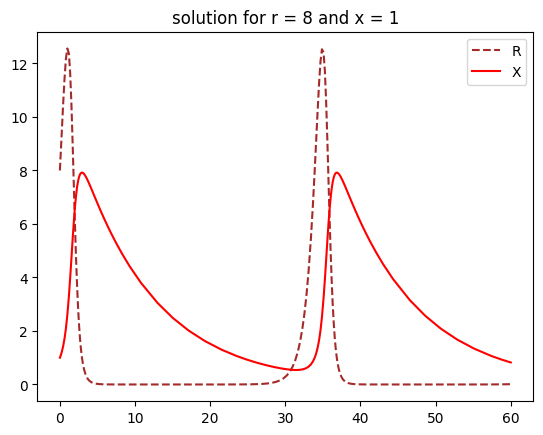

In [8]:
import random
for i in range(10):
  r,x = random.randint(1, 9),random.randint(1, 9)
  plot_ei(r0 = r, x0 = x)
  plt.title('solution for r = {} and x = {}'.format(r,x))

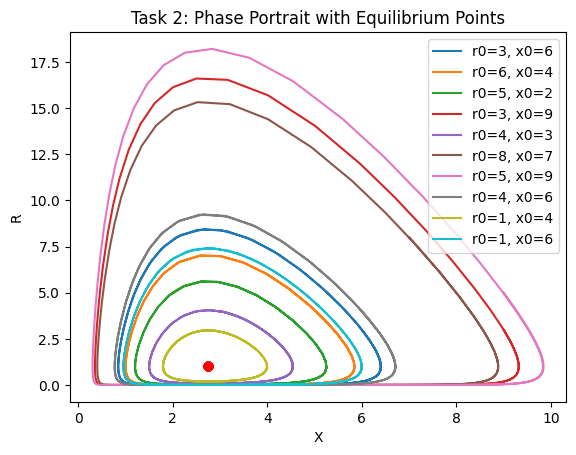

In [17]:

fig = plt.figure()
ax = fig.gca()
for _ in range(10):
    r0, x0 = random.randint(1, 9), random.randint(1, 9)
    sol = plot_ei(alpha, beta, delta, gamma, r0, x0)
    ax.plot(sol.y[1, :], sol.y[0, :], label=f'r0={r0}, x0={x0}')

# Task 3: Solve for equilibria
from scipy.optimize import fsolve

def equilibria(alpha, beta, delta, gamma):
    def equations(p):
        r, x = p
        return [(alpha * r) - (beta * r * x), (delta * r * x) - (gamma * x)]

    eq_points = []

    for r_guess in range(1, 10):
        for x_guess in range(1, 10):
            eq = fsolve(equations, [r_guess, x_guess])
            if all(eq > 0):
                eq_points.append(eq)

    return eq_points

equilibrium_points = equilibria(alpha, beta, delta, gamma)

for eq_point in equilibrium_points:
    ax.plot(eq_point[1], eq_point[0], 'ro')  # Mark equilibrium points as red dots

ax.set_xlabel('X')
ax.set_ylabel('R')
ax.legend()
plt.title('Task 2: Phase Portrait with Equilibrium Points')

plt.show()
